In [1]:
import numpy as np

invcov=np.array([[2,1,0],[1,2,1],[0,1,2]])
covmat=np.linalg.inv(invcov)

samp = np.random.multivariate_normal([0,0,0],covmat,size=(10000,10000))

#sampcov=np.zeros((3,3,1000))
#sampcovinv=np.zeros((3,3,1000))
sampcorr=np.zeros((3,3,10000))
sampcorrinv=np.zeros((3,3,10000))

for i in range(10000):
    #sampcov[:,:,i] = np.cov(samp[:,i,:],rowvar=False)
    #sampcovinv[:,:,i] = np.linalg.inv(sampcov[:,:,i])
    sampcorr[:,:,i] = np.corrcoef(samp[:,i,:],rowvar=False)
    sampcorrinv[:,:,i] = np.linalg.inv(sampcorr[:,:,i])

#sampcov[0,1,:] = sampcov[0,1,:] + np.random.normal(0,1,1000)
#fcov = np.corrcoef(sampcov[0,1:3,:])
#finvcov = np.corrcoef(sampcovinv[0,1:3,:])

sampcorrinv[0,1,:] = sampcorrinv[0,1,:] + np.random.normal(0,1,10000)
fcorrinv = np.corrcoef(sampcorrinv[0,1:3,:])
sampcorr[0,1,:] = sampcorr[0,1,:] + np.random.normal(0,1,10000)
fcorr = np.corrcoef(sampcorr[0,1:3,:])

#print(fcov)
#print(finvcov)
print(fcorr)
print(fcorrinv)

[[1.         0.00939125]
 [0.00939125 1.        ]]
[[1.         0.01340321]
 [0.01340321 1.        ]]


In [2]:
def generate_corr_stats(
    invcov,
    sampsize=100,
    sigscale=1,
    normvar=1
):
    invcov = invcov*sigscale
    covmat = np.linalg.inv(invcov)
    samp = np.random.multivariate_normal([0,0,0],covmat,size=(sampsize,sampsize))
    
    sampcov=np.zeros((3,3,sampsize))
    sampcovinv=np.zeros((3,3,sampsize))
    sampcorr=np.zeros((3,3,sampsize))
    sampcorrinv=np.zeros((3,3,sampsize))
    
    for i in range(sampsize):
        sampcov[:,:,i] = np.cov(samp[:,i,:],rowvar=False)
        sampcovinv[:,:,i] = np.linalg.inv(sampcov[:,:,i])
        sampcorr[:,:,i] = np.corrcoef(samp[:,i,:],rowvar=False)
        sampcorrinv[:,:,i] = np.linalg.inv(sampcorr[:,:,i])
        
    sampcov[0,1,:] = sampcov[0,1,:] + np.random.normal(0,normvar,sampsize)
    sampcovinv[0,1,:] = sampcovinv[0,1,:] + np.random.normal(0,normvar,sampsize)
    sampcorr[0,1,:] = sampcorr[0,1,:] + np.random.normal(0,normvar,sampsize)
    sampcorrinv[0,1,:] = sampcorrinv[0,1,:] + np.random.normal(0,normvar,sampsize)
    
    fcov = np.corrcoef(sampcov[0,1:3,:])
    gcov = np.linalg.inv(fcov)[0,1]
    fcovinv = np.corrcoef(sampcovinv[0,1:3,:])
    gcovinv = np.linalg.inv(fcovinv)[0,1]
    fcorr = np.corrcoef(sampcorr[0,1:3,:])
    gcorr = np.linalg.inv(fcorr)[0,1]
    fcorrinv = np.corrcoef(sampcorrinv[0,1:3,:])
    gcorrinv = np.linalg.inv(fcorrinv)[0,1]
    
    return fcov[0,1], fcovinv[0,1], fcorr[0,1], fcorrinv[0,1], gcov, gcovinv, gcorr, gcorrinv

In [3]:
from graspy.plot import heatmap
invcov=np.array([[2,1,0],[1,2,1],[0,1,2]])

resol=100
fcov = np.zeros((resol,resol))
gcov = np.zeros((resol,resol))
fcovinv = np.zeros((resol,resol))
gcovinv = np.zeros((resol,resol))
fcorr = np.zeros((resol,resol))
gcorr = np.zeros((resol,resol))
fcorrinv = np.zeros((resol,resol))
gcorrinv = np.zeros((resol,resol))

for x in range(100):
    for y in range(100):
        f1,f2,f3,f4,g1,g2,g3,g4 = generate_corr_stats(invcov,sampsize=100,sigscale=.01*(1+x),normvar=.005*(1+y))
        fcov[x,y]=f1
        gcov[x,y]=g1
        fcovinv[x,y]=f2
        gcovinv[x,y]=g2
        fcorr[x,y]=f3
        gcorr[x,y]=g3
        fcorrinv[x,y]=f4
        gcorrinv[x,y]=g4
        
#heatmap(fcov,title='fcov')
#heatmap(gcov,title='gcov')
#heatmap(fcovinv,title='fcovinv')
#heatmap(gcovinv,title='gcovinv')
#heatmap(fcorr,title='fcorr')
#heatmap(gcorr,title='gcorr')
#heatmap(fcorrinv,title='fcorrinv')
#heatmap(gcorrinv,title='gcorrinv')


Text(0.5, 134.59999999999997, 'Variance of Noise (.005-.505)')

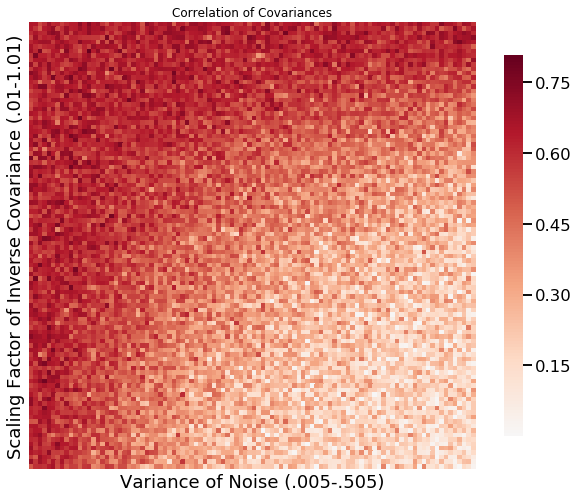

In [22]:
import matplotlib.pyplot as plt

heatmap(np.absolute(fcov))
plt.title('Correlation of Covariances')
plt.ylabel('Scaling Factor of Inverse Covariance (.01-1.01)')
plt.xlabel('Variance of Noise (.005-.505)')

2.3183603638833663


Text(0.5, 134.59999999999997, 'Variance of Noise (.005-.505)')

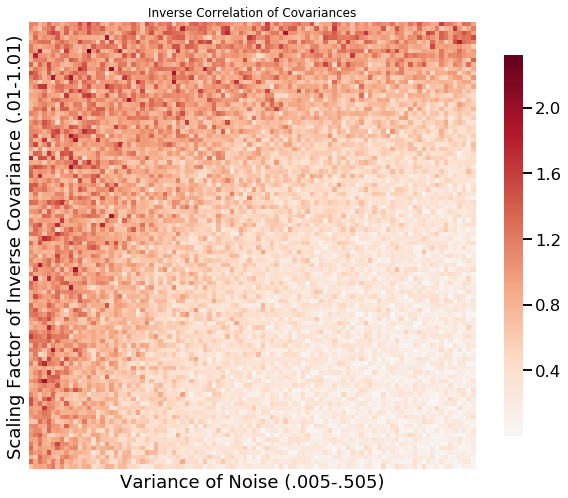

In [23]:
heatmap(np.absolute(gcov))
print(np.amax(gcov))
plt.title('Inverse Correlation of Covariances')
plt.ylabel('Scaling Factor of Inverse Covariance (.01-1.01)')
plt.xlabel('Variance of Noise (.005-.505)')

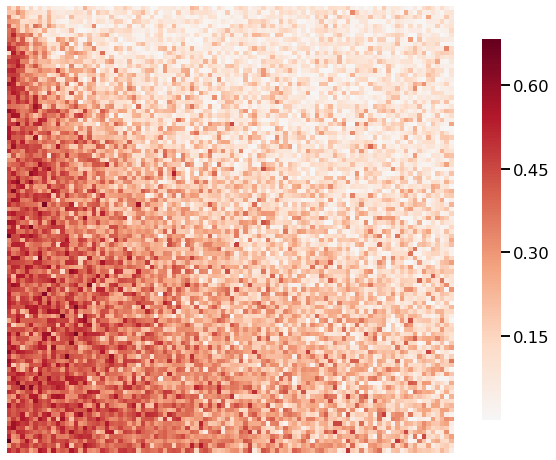

In [6]:
heatmap(np.absolute(fcovinv))

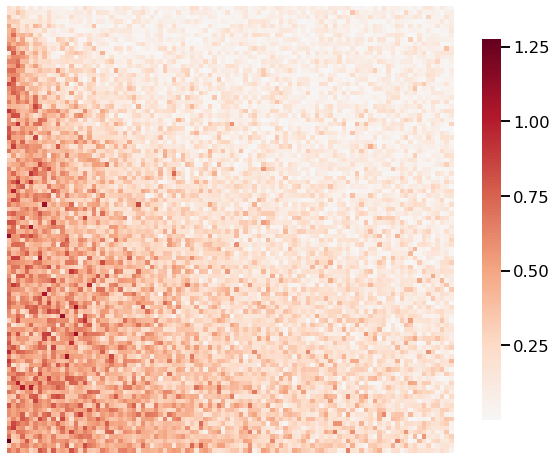

In [7]:
heatmap(np.absolute(gcovinv))

Text(0.5, 134.59999999999997, 'Variance of Noise (.005-.505)')

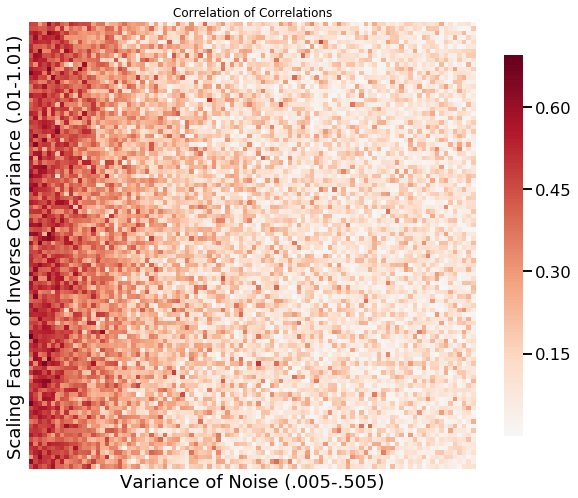

In [20]:
heatmap(np.absolute(fcorr))

plt.title('Correlation of Correlations')
plt.ylabel('Scaling Factor of Inverse Covariance (.01-1.01)')
plt.xlabel('Variance of Noise (.005-.505)')

Text(0.5, 134.59999999999997, 'Variance of Noise (.005-.505)')

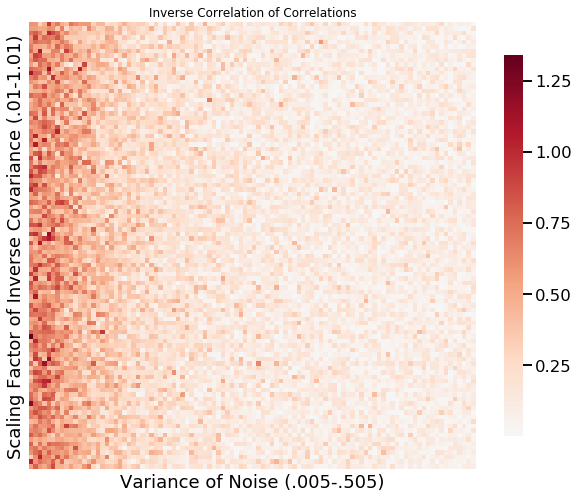

In [21]:
heatmap(np.absolute(gcorr))

plt.title('Inverse Correlation of Correlations')
plt.ylabel('Scaling Factor of Inverse Covariance (.01-1.01)')
plt.xlabel('Variance of Noise (.005-.505)')

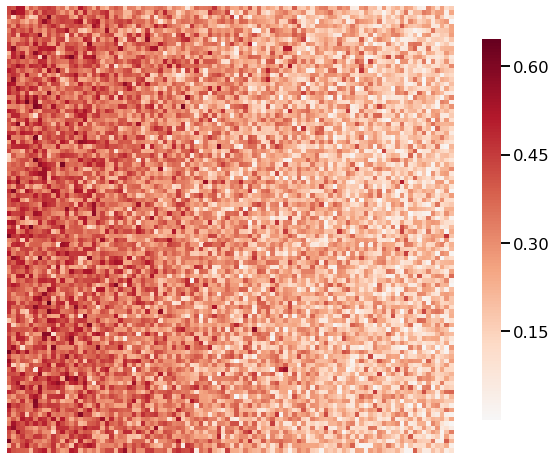

In [10]:
heatmap(np.absolute(fcorrinv))

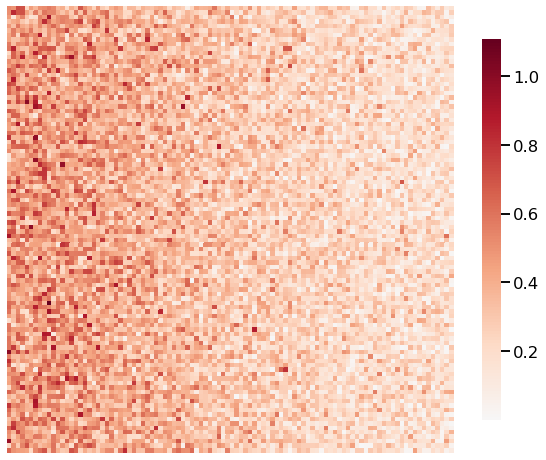

In [11]:
heatmap(np.absolute(gcorrinv))